In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Text preprocessing
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
nlp = spacy.load("en")

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Download Natural Language Toolkit (run this cell once)
nltk.download('all')

In [0]:
# Reading the SMS collection file

sms = pd.read_csv('/content/drive/My Drive/Machine Learning/SMS Spam Filter/SMSSpamCollection', sep="\t", header=None,
                  names=["Label", "Message"], encoding='utf-8')

In [0]:
sms.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# Data sample

display(sms.head(n = 10))
print('--------------------------------------------------')

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


--------------------------------------------------


In [0]:
# Data info

sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Label      5572 non-null object
Message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


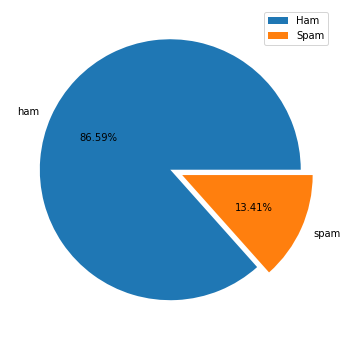

In [0]:
# Plotting the data distribution 

sms["Label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.2f%%')
plt.ylabel('')
plt.legend(["Ham", "Spam"])
plt.show()

In [0]:
# Inspecting top 10 SMS messages

topMessages = sms.groupby("Message")["Label"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
Message,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Ok,4,ham
Okie,4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st ""Ur Lovely Friendship""... good morning dear",4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!,4,spam


In [0]:
# Reomving stop words

%%time
spamMessages = sms[sms["Label"] == "spam"]["Message"]
hamMessages = sms[sms["Label"] == "ham"]["Message"]

spamWords = []
hamWords = []


def extractSpamWords(spamMessages):
    global spamWords
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spamWords = spamWords + words
    
def extractHamWords(hamMessages):
    global hamWords
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    hamWords = hamWords + words

spamMessages.apply(extractSpamWords)
hamMessages.apply(extractHamWords)

CPU times: user 14.4 s, sys: 1.32 s, total: 15.7 s
Wall time: 15.8 s


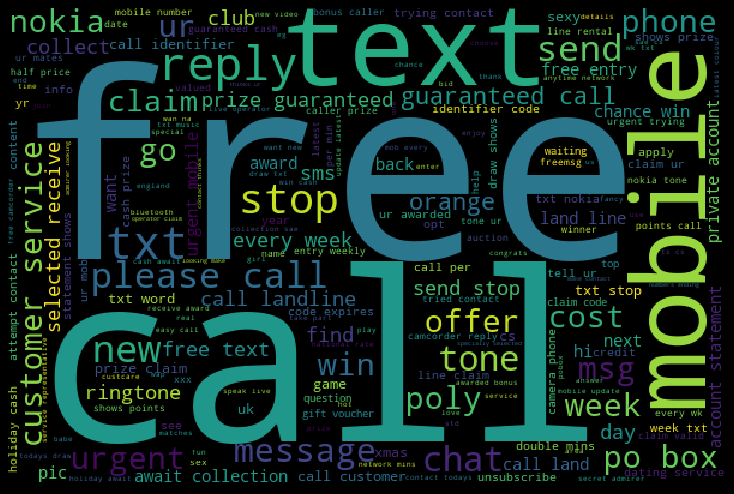

In [0]:
# Visualizing spam WordCloud (more important words are bigger in size)

spamWordCloud = WordCloud(width=600, height=400).generate(" ".join(spamWords))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spamWordCloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

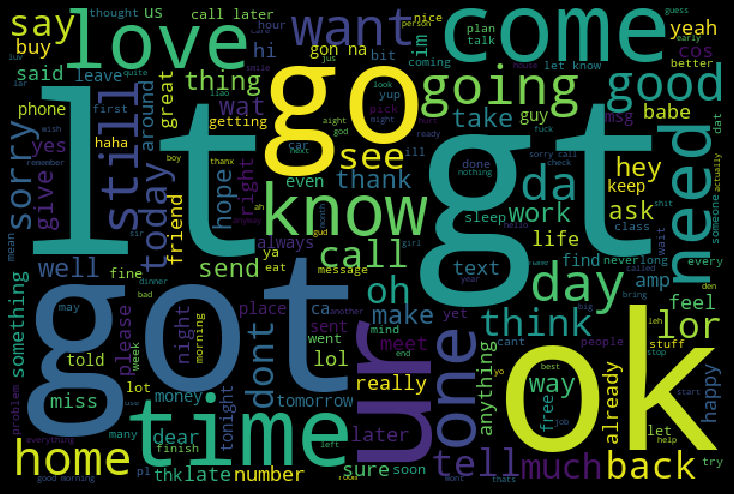

In [0]:
# Visualizing ham WordCloud (more important words are bigger in size)

hamWordCloud = WordCloud(width=600, height=400).generate(" ".join(hamWords))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(hamWordCloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [0]:
# Cleaning the messages

stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

sms["Message"] = sms["Message"].apply(cleanText)
sms.head(n = 10) 

,Label,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkts 2...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
5,spam,freemsg hey darl 3 week word back id like fun ...
6,ham,even brother like speak treat like aid patent
7,ham,per request mell mell oru minnaminungint nurun...
8,spam,winner valu network custom select receivea £90...
9,spam,mobil 11 month u r entitl updat latest colour ...


In [0]:
vectors = TfidfVectorizer(encoding="utf-8", strip_accents="unicode", stop_words="english")
features = vectors.fit_transform(sms["Message"])
print(features.shape)

(5572, 7961)


In [0]:
for i in range(len(sms.Label)):
  if sms.Label[i] == "ham":
    sms.Label[i] = 0
  elif sms.Label[i] == "spam":
    sms.Label[i] = 1
sms.Label = sms.Label.astype('int')
X_train, X_test, y_train, y_test = train_test_split(features, sms.Label, test_size=0.2, random_state=0)

In [0]:
print(X_train.shape, y_train)

(4457, 7961) 1114    0
3589    0
3095    0
1012    0
3320    0
       ..
4931    1
3264    0
1653    1
2607    0
2732    0
Name: Label, Length: 4457, dtype: int64


In [0]:
# Searching for best parameters using GridSearch

model = LogisticRegression(random_state=0)
C_range = [i for i in range(1,101)]
C_range.append(0.001)
C_range.append(0.01)
C_range.append(0.1)
C_range.append(0.5)
grid_values = {'penalty': ['l1', 'l2'], 'C':C_range}
grid_clf_acc = GridSearchCV(model, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.5f"
      % (grid_clf_acc.best_params_, grid_clf_acc.best_score_))

The best parameters are {'C': 94, 'penalty': 'l2'} with a score of 0.97128


In [0]:
# Using best parameters to train a new model
%%time
X_train, X_test, y_train, y_test = train_test_split(features, sms["Label"], test_size = 0.2, random_state=0)
clf = LogisticRegression(C=grid_clf_acc.best_params_['C'], penalty=grid_clf_acc.best_params_['penalty'], random_state=0)
clf.fit(X_train, y_train)

# Calculating train & test accuracy using f1_score
Train_accuracy = clf.score(X_train, y_train)
Test_accuracy = clf.score(X_test, y_test)
print(f'Training accuracy = {Train_accuracy*100:.3f}%, Testing accuracy = {Test_accuracy*100:.3f}%')

Training accuracy = 100.000%, Testing accuracy = 98.565%
CPU times: user 24.6 ms, sys: 1.33 ms, total: 26 ms
Wall time: 25.9 ms


In [0]:
# Trying different models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [0]:
# All paramaters are determined by trial and error

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=10)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=0)
rfc = RandomForestClassifier(n_estimators=31, random_state=0)
abc = AdaBoostClassifier(n_estimators=62, random_state=0)
bc = BaggingClassifier(n_estimators=9, random_state=0)
etc = ExtraTreesClassifier(n_estimators=9, random_state=0)

clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [0]:
################################################################################################
### Here, I'll be concenrned with the precision score as I don't want any ham messages to be ###
#### misclassified as spam but I don't mind some spam messages to be missclassified as ham. ####
################################################################################################
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)
def predict_labels(clf, X_test):
    return (clf.predict(X_test))
    
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v, X_test)
    pred_scores.append((k, [precision_score(y_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

,Score
SVC,1.000000
KN,1.000000
NB,0.937500
DT,0.905660
RF,0.992701
AdaBoost,0.977444
BgC,0.946309
ETC,0.978571


In [0]:
# Testing specific messages
SMS1 = '[URGENT!] Your Mobile No 398174814449 was awarded a vacation'
SMS2 = 'Hello my friend, how are you?'


In [0]:
# Applying the same pre-processing and the pre-trained model
SMS1_clean = cleanText(SMS1)
SMS1_features = vectors.transform([SMS1_clean])
prediction1 = clf.predict(SMS1_features)

SMS2_clean = cleanText(SMS2)
SMS2_features = vectors.transform([SMS2_clean])
prediction2 = clf.predict(SMS2_features)

In [0]:
# Printing the prediction in terms of 'ham' or 'spam'
class1 = 'spam' if prediction1 == 1 else 'ham'
class2 = 'spam' if prediction2 == 1 else 'ham'

print(f'SMS1 is {class1} .. SMS2 is {class2}')

SMS1 is spam .. SMS2 is ham
